In [128]:
#importer les librairies
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_profiling import ProfileReport

In [143]:
#impoter le dataset train en créant un dictionnaire de valeurs manquantes
missing_values = ["n/a", "na", "--","NaN","nan","N/A"]
train = pd.read_csv('train.csv', na_values = missing_values)
#renommer la colonne Unnamed en index
train.rename(columns={'Unnamed: 0': 'index'}, inplace =True)
#indexer la colonne index
train.set_index('index',inplace=True)

In [144]:
#afficher les 3 premieres lignes du train
train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,status_matrimonial,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
index,,,,,,,,,,,,,,,,,,,,,
942,no checking,18,critical/other existing credit,radio/tv,1169,no known savings,1<=X<4,4,male,single,...,life insurance,29,none,own,2,skilled,1,yes,yes,good
202,no checking,9,existing paid,furniture/equipment,1980,<100,<1,2,female,div/dep/mar,...,car,19,none,rent,2,skilled,1,none,yes,bad
141,0<=X<200,12,existing paid,furniture/equipment,3017,<100,<1,3,female,div/dep/mar,...,real estate,34,none,rent,1,high qualif/self emp/mgmt,1,none,yes,good


In [183]:
#liste des variables catégorielles et numériques
#création de deux nouveaux dataframe cat et num

cat = train[['checking_status','employment','credit_history','purpose','savings_status','sex','status_matrimonial','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']]
num = train[['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']]

In [184]:
cat

,checking_status,employment,credit_history,purpose,savings_status,sex,status_matrimonial,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
index,,,,,,,,,,,,,,,
942,no checking,1<=X<4,critical/other existing credit,radio/tv,no known savings,male,single,none,life insurance,none,own,skilled,yes,yes,good
202,no checking,<1,existing paid,furniture/equipment,<100,female,div/dep/mar,co applicant,car,none,rent,skilled,none,yes,bad
141,0<=X<200,<1,existing paid,furniture/equipment,<100,female,div/dep/mar,none,real estate,none,rent,high qualif/self emp/mgmt,none,yes,good
66,<0,>=7,existing paid,new car,no known savings,female,div/dep/mar,none,car,bank,own,skilled,none,yes,bad
370,0<=X<200,>=7,existing paid,business,500<=X<1000,male,mar/wid,none,real estate,none,own,skilled,yes,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,<0,>=7,existing paid,radio/tv,<100,male,single,none,real estate,stores,own,unskilled resident,none,yes,bad
967,no checking,1<=X<4,existing paid,new car,<100,male,single,none,real estate,none,own,unskilled resident,none,no,good
894,<0,4<=X<7,critical/other existing credit,used car,<100,male,single,none,car,none,own,skilled,yes,yes,bad


In [185]:
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
index,,,,,,,
942,18,1169,4,3,29,2,1
202,9,1980,2,2,19,2,1
141,12,3017,3,1,34,1,1
66,24,915,4,2,29,1,1
370,14,1410,1,2,35,1,1
...,...,...,...,...,...,...,...
913,12,709,4,4,57,1,1
967,10,1546,3,2,31,1,2
894,36,9629,4,4,24,2,1


In [109]:
#visualisation des données avec pandas_profiling
prof = ProfileReport(train)
prof.to_file(output_file='rapport.html')

In [180]:
#imputation variables numériques

num['duration'].fillna((num['duration'].median()), inplace = True)
num['credit_amount'].dropna(inplace = True)
num['installment_commitment'].fillna((num['installment_commitment'].mean()), inplace = True)
num['residence_since'].fillna((num['residence_since'].median()), inplace = True)
num['age'].fillna((num['age'].median()), inplace = True)
num['existing_credits'].fillna((num['existing_credits'].median()), inplace = True)
num['num_dependents'].fillna((num['num_dependents'].median()), inplace = True)



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [186]:
#imputation variables catégorielles
cat['credit_history'].fillna((cat['credit_history'].mode()), inplace =True)
cat['checking_status'].fillna((cat['checking_status'].mode()), inplace =True)
cat['employment'].fillna((cat['employment'].mode()), inplace =True)
cat['purpose'].fillna((cat['purpose'].mode()), inplace =True)
cat['savings_status'].fillna((cat['savings_status'].mode()), inplace =True)
cat['sex'].fillna((cat['sex'].mode()), inplace =True)
cat['status_matrimonial'].fillna((cat['status_matrimonial'].mode()), inplace =True)
cat['other_parties'].fillna((cat['other_parties'].mode()), inplace =True)
cat['property_magnitude'].fillna((cat['property_magnitude'].mode()), inplace =True)
cat['other_payment_plans'].fillna((cat['other_payment_plans'].mode()), inplace =True)
cat['housing'].fillna((cat['housing'].mode()), inplace =True)
cat['job'].fillna((cat['job'].mode()), inplace =True)
cat['own_telephone'].fillna((cat['own_telephone'].mode()), inplace =True)
cat['foreign_worker'].fillna((cat['foreign_worker'].mode()), inplace =True)



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:>

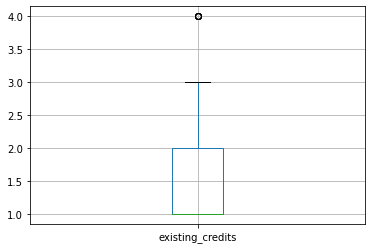

In [187]:
#traitons les variables numériques
#detection des valeurs abérrantes/ Outliers
#visualisation
#num.boxplot(column='duration')
#num.boxplot(column='credit_amount')
#num.boxplot(column='installment_commitment')
#num.boxplot(column='residence_since')
#num.boxplot(column='age')
num.boxplot(column='existing_credits')
#num.boxplot(column='num_dependents')





In [188]:
#nous allons maintenant remplacer les valeurs abérrantes
num['existing_credits'] = num['existing_credits'].mask(num['existing_credits']>3, mean)


NameError: name 'mean' is not defined

<AxesSubplot:>

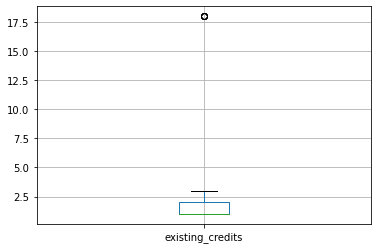

In [177]:
num.boxplot(column='existing_credits')

In [179]:
num.head(20)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
index,,,,,,,
942,18,1169,4,3,29,2.0,1
202,9,1980,2,2,19,2.0,1
141,12,3017,3,1,34,1.0,1
66,24,915,4,2,29,1.0,1
370,14,1410,1,2,35,1.0,1
438,24,1249,4,2,28,1.0,1
939,15,1829,4,4,46,2.0,1
675,24,2197,4,4,43,2.0,2
710,9,654,4,3,28,1.0,1
